# Read Dataset

In [1]:
socar_df = pd.read_csv('insurance_fraud_detect_data.csv')

socar = socar_df.copy()
socar.tail()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
15995,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15996,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15997,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15998,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0
15999,0,2,0,2,0,1,0,100,1,0,...,1188750,2,0,0,1,0,0,0,-1,0


In [2]:
# test set is for evaluating our models.
socar_tr = socar[socar.test_set == 0].drop(['test_set'], axis=1)
socar_test = socar[socar.test_set == 1].drop(['test_set'], axis=1)

In [5]:
socar_tr.describe()

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,...,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt
count,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,...,1.287900e+04,1.287900e+04,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000,12879.000000
mean,0.002640,1.698657,0.150555,2.476823,0.075705,2.531175,0.012423,89.106297,1.760385,0.131687,...,2.834380e+05,8.377547e+05,1.296762,0.326966,0.170976,1.362140,0.254290,0.309496,0.248001,-0.536222
std,0.051315,0.764744,0.357629,1.172060,0.264535,1.163629,0.157144,29.609672,0.724547,0.338164,...,5.165063e+05,3.063806e+06,1.334077,0.469123,0.376503,0.947978,0.463466,0.580147,0.431869,0.957266
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,100.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,100.000000,2.000000,0.000000,...,1.887618e+05,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
75%,0.000000,2.000000,0.000000,3.000000,0.000000,4.000000,0.000000,100.000000,2.000000,0.000000,...,3.621340e+05,5.546450e+05,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
max,1.000000,5.000000,1.000000,5.000000,1.000000,4.000000,2.000000,100.000000,3.000000,1.000000,...,9.713774e+06,9.471435e+07,5.000000,1.000000,1.000000,37.000000,3.000000,2.000000,1.000000,5.000000


# EDA

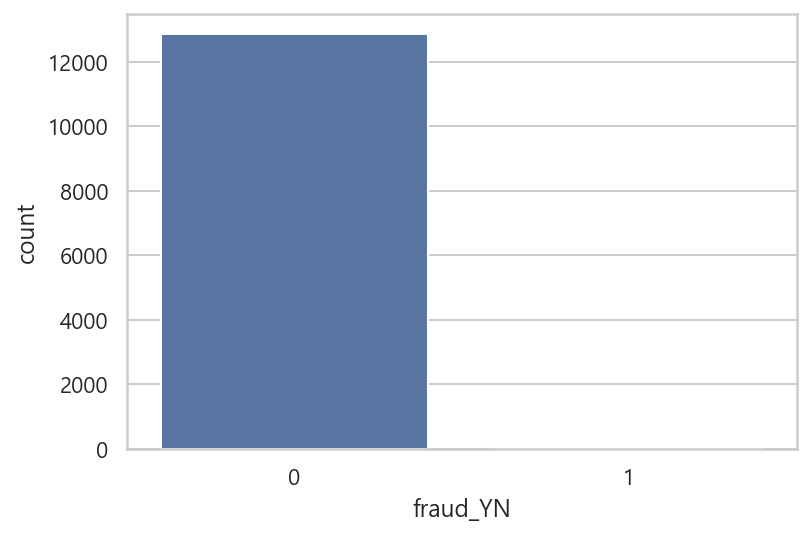

In [6]:
# Imbalanced Dataset
sns.countplot(data=socar_tr, x='fraud_YN');

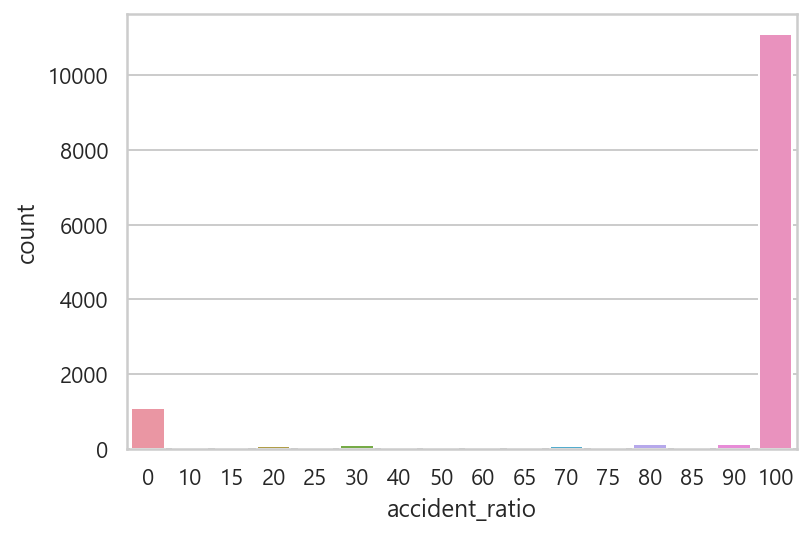

In [7]:
sns.countplot(data=socar_tr, x='accident_ratio');

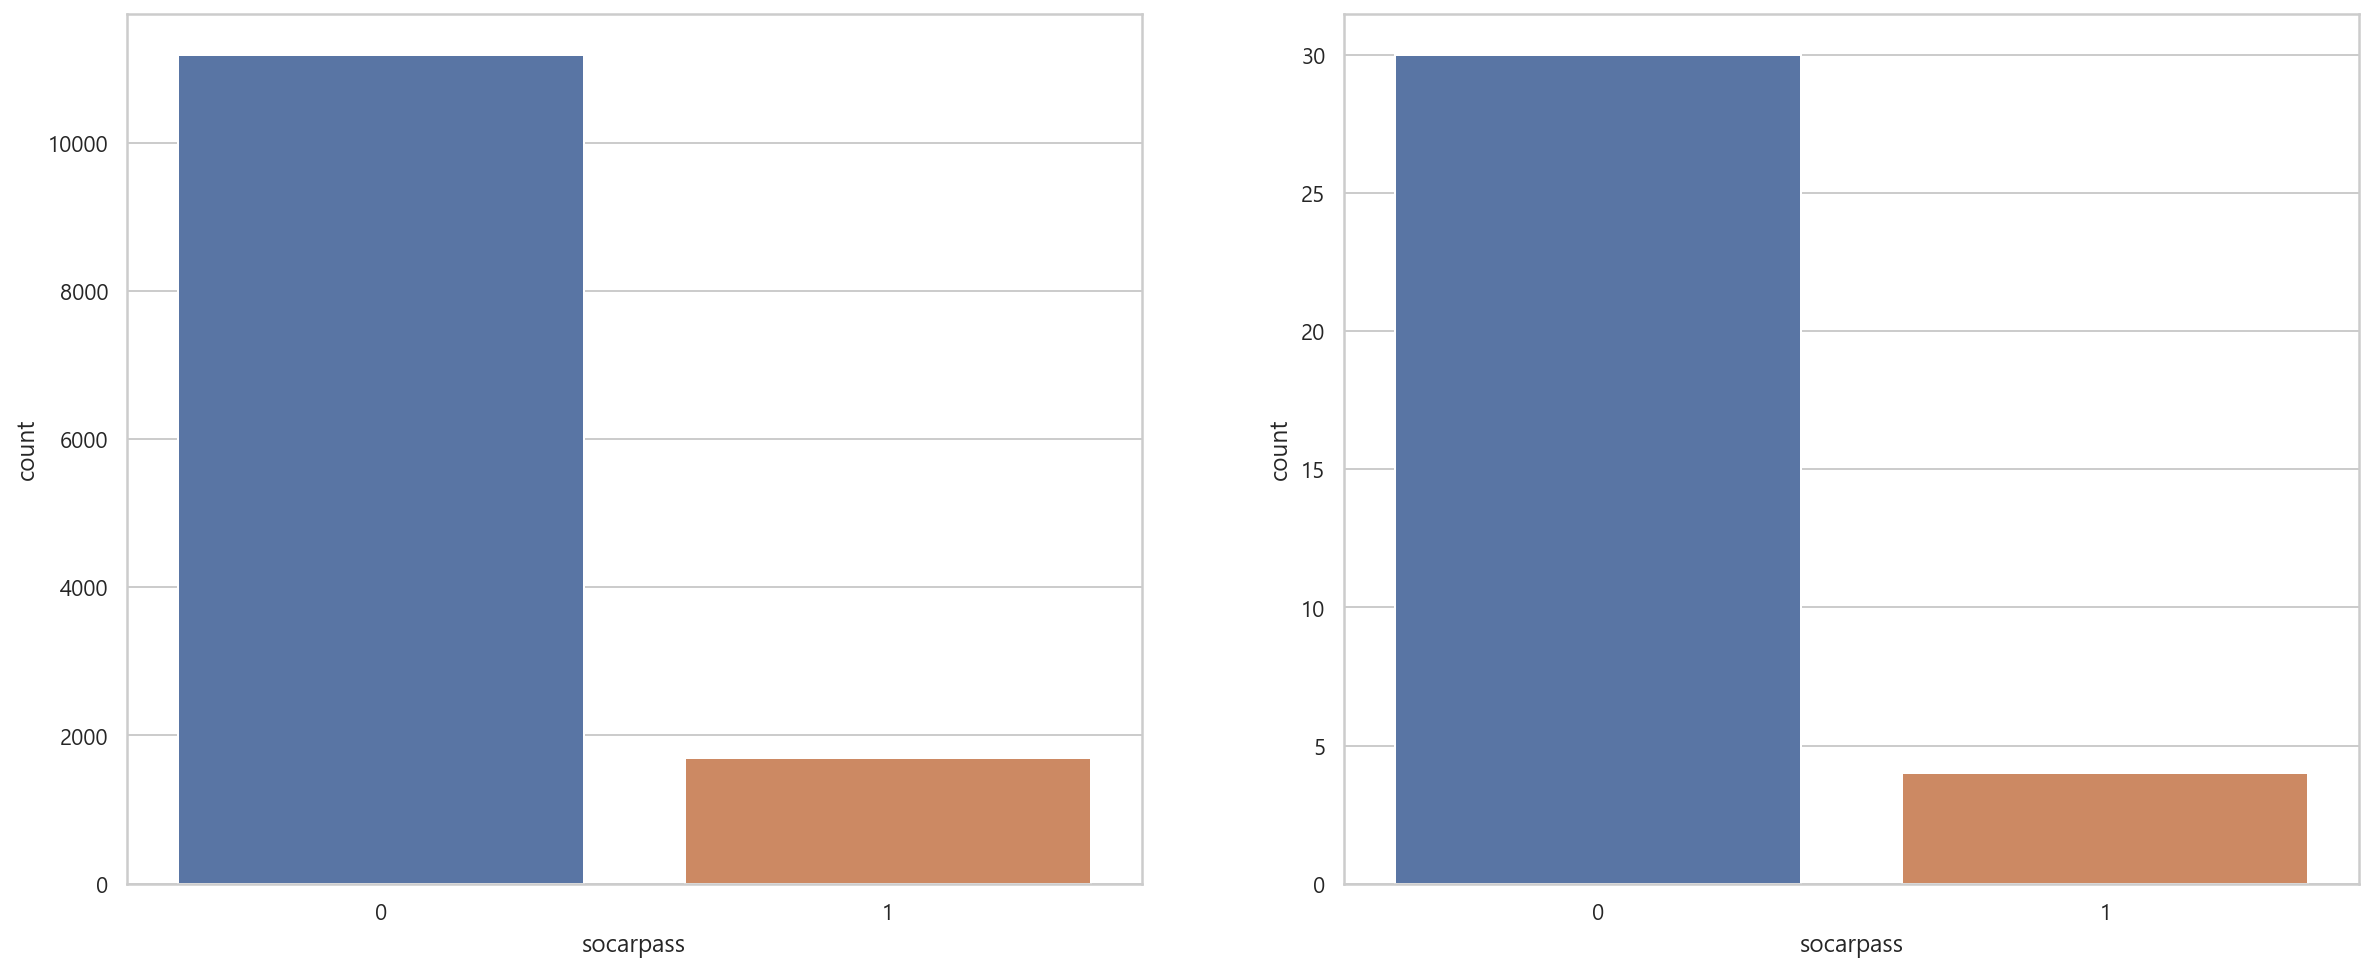

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar_tr, x='socarpass', ax=ax[0]);
sns.countplot(data=socar_tr[socar_tr.fraud_YN == 1], x='socarpass', ax=ax[1]);

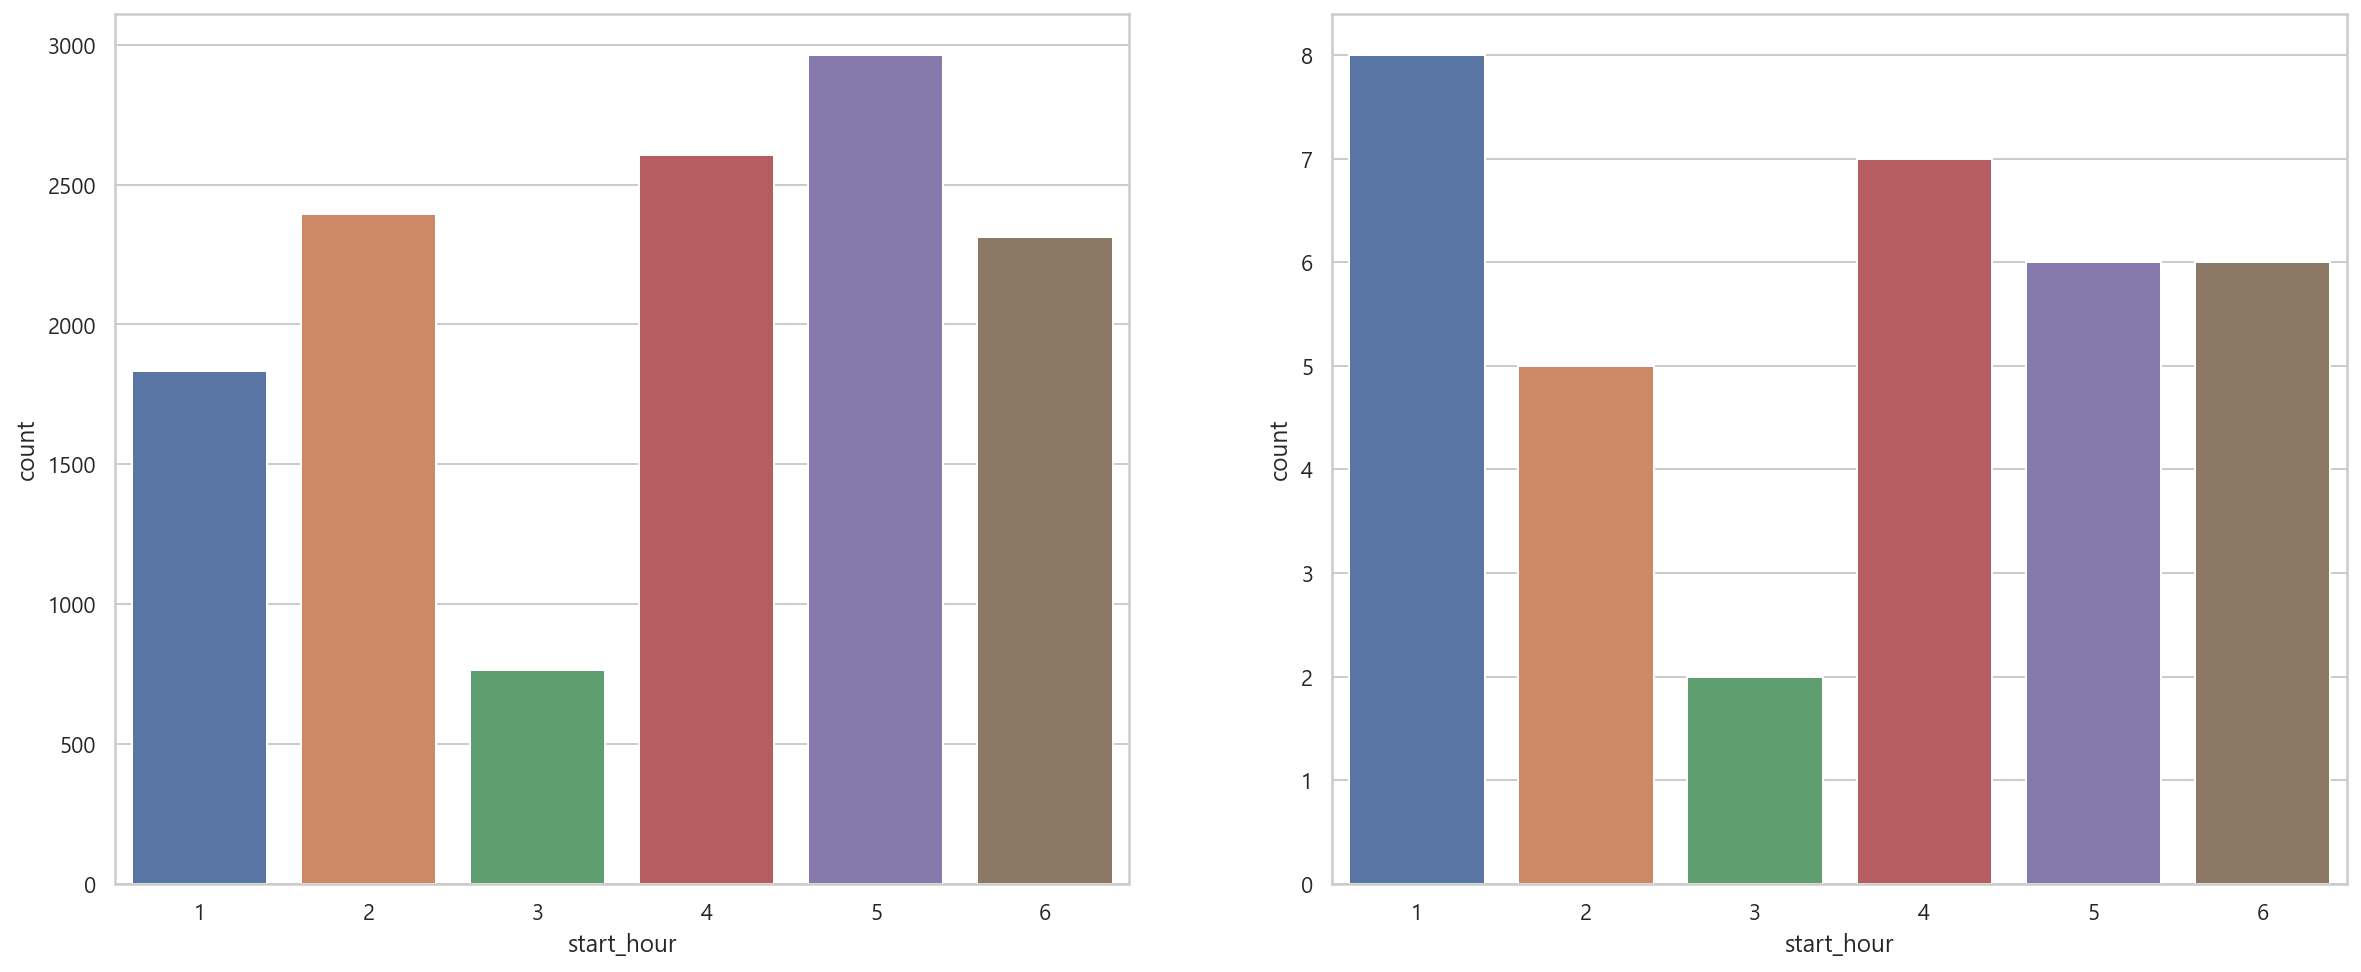

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar_tr, x='start_hour', ax=ax[0]);
sns.countplot(data=socar_tr[socar_tr.fraud_YN == 1], x='start_hour', ax=ax[1]);

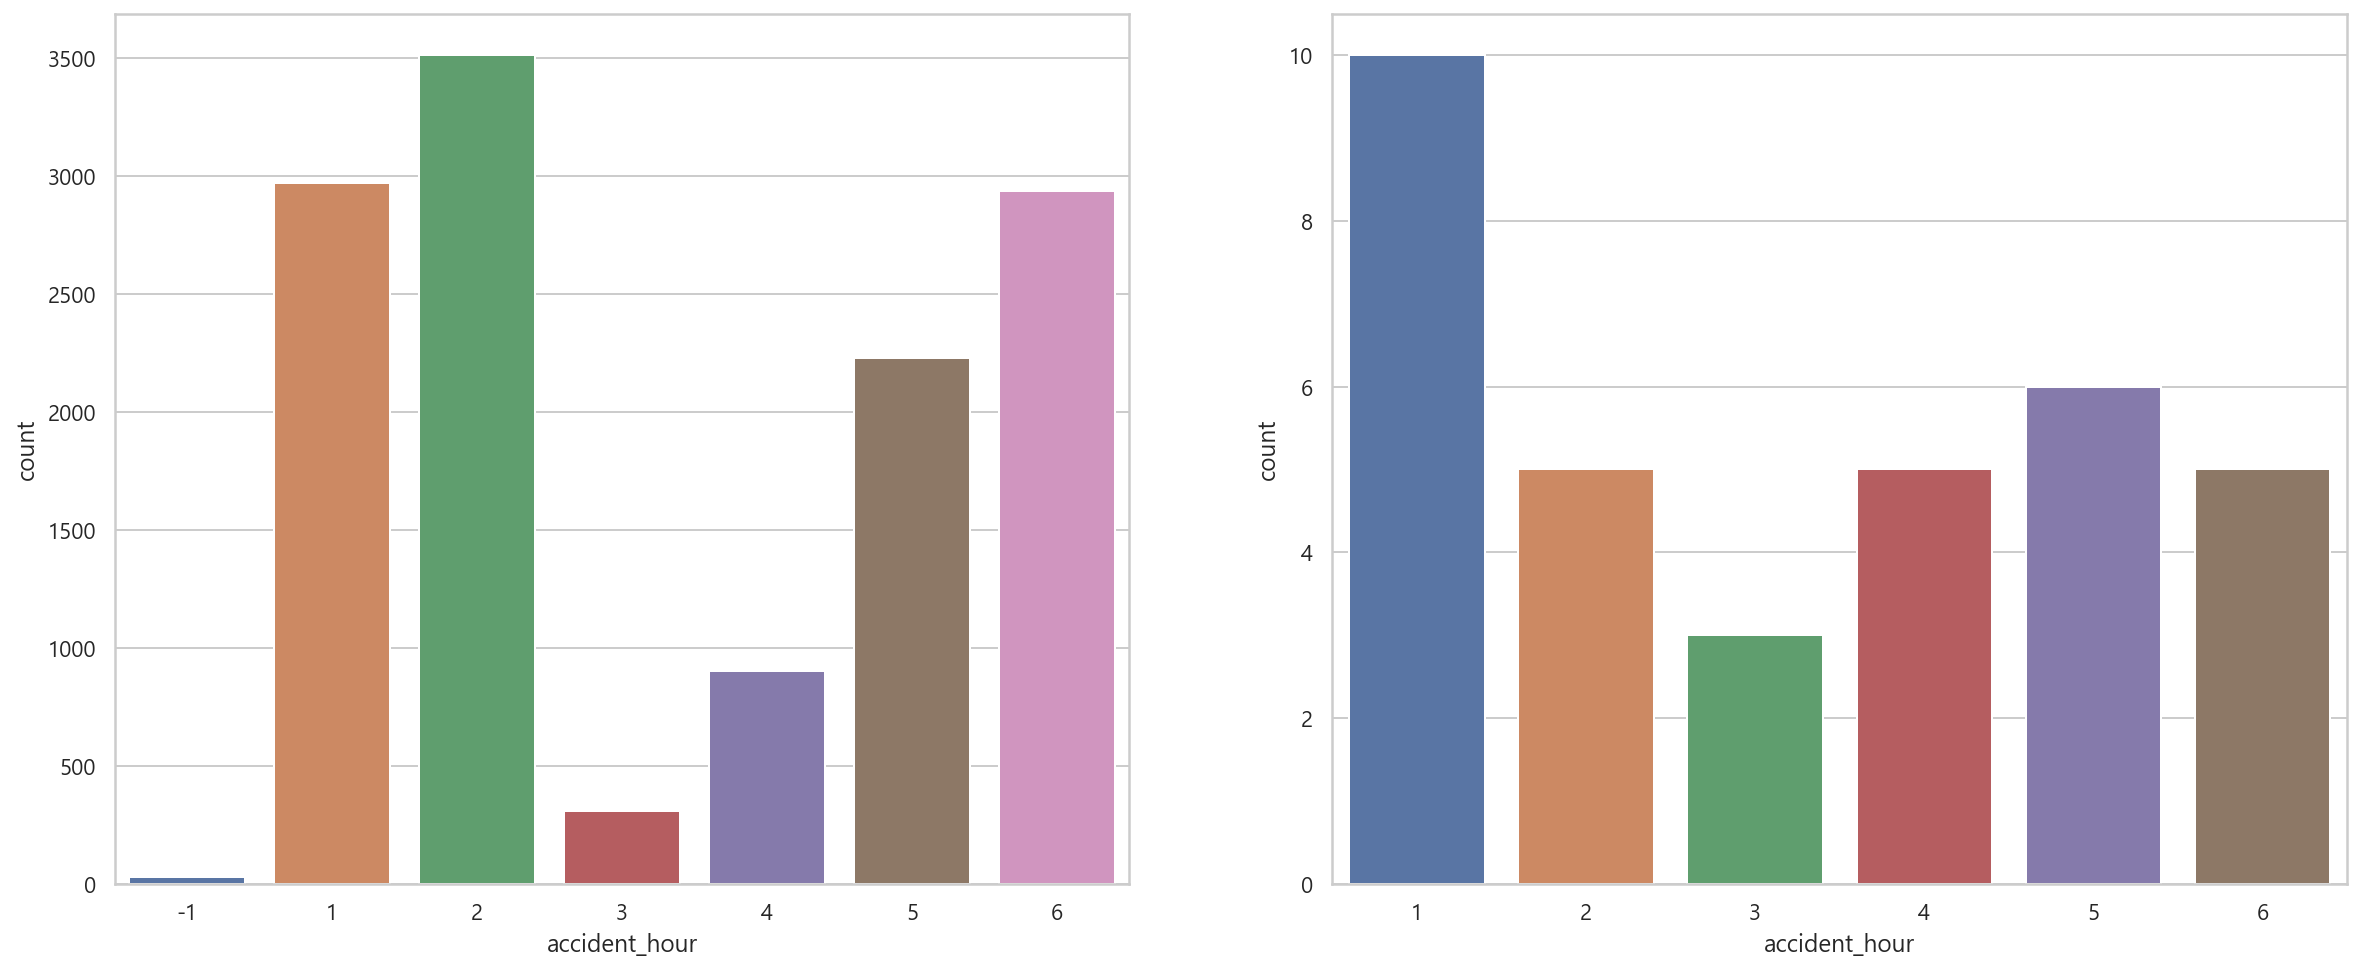

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar_tr, x='accident_hour', ax=ax[0]);
sns.countplot(data=socar_tr[socar_tr.fraud_YN == 1], x='accident_hour', ax=ax[1]);

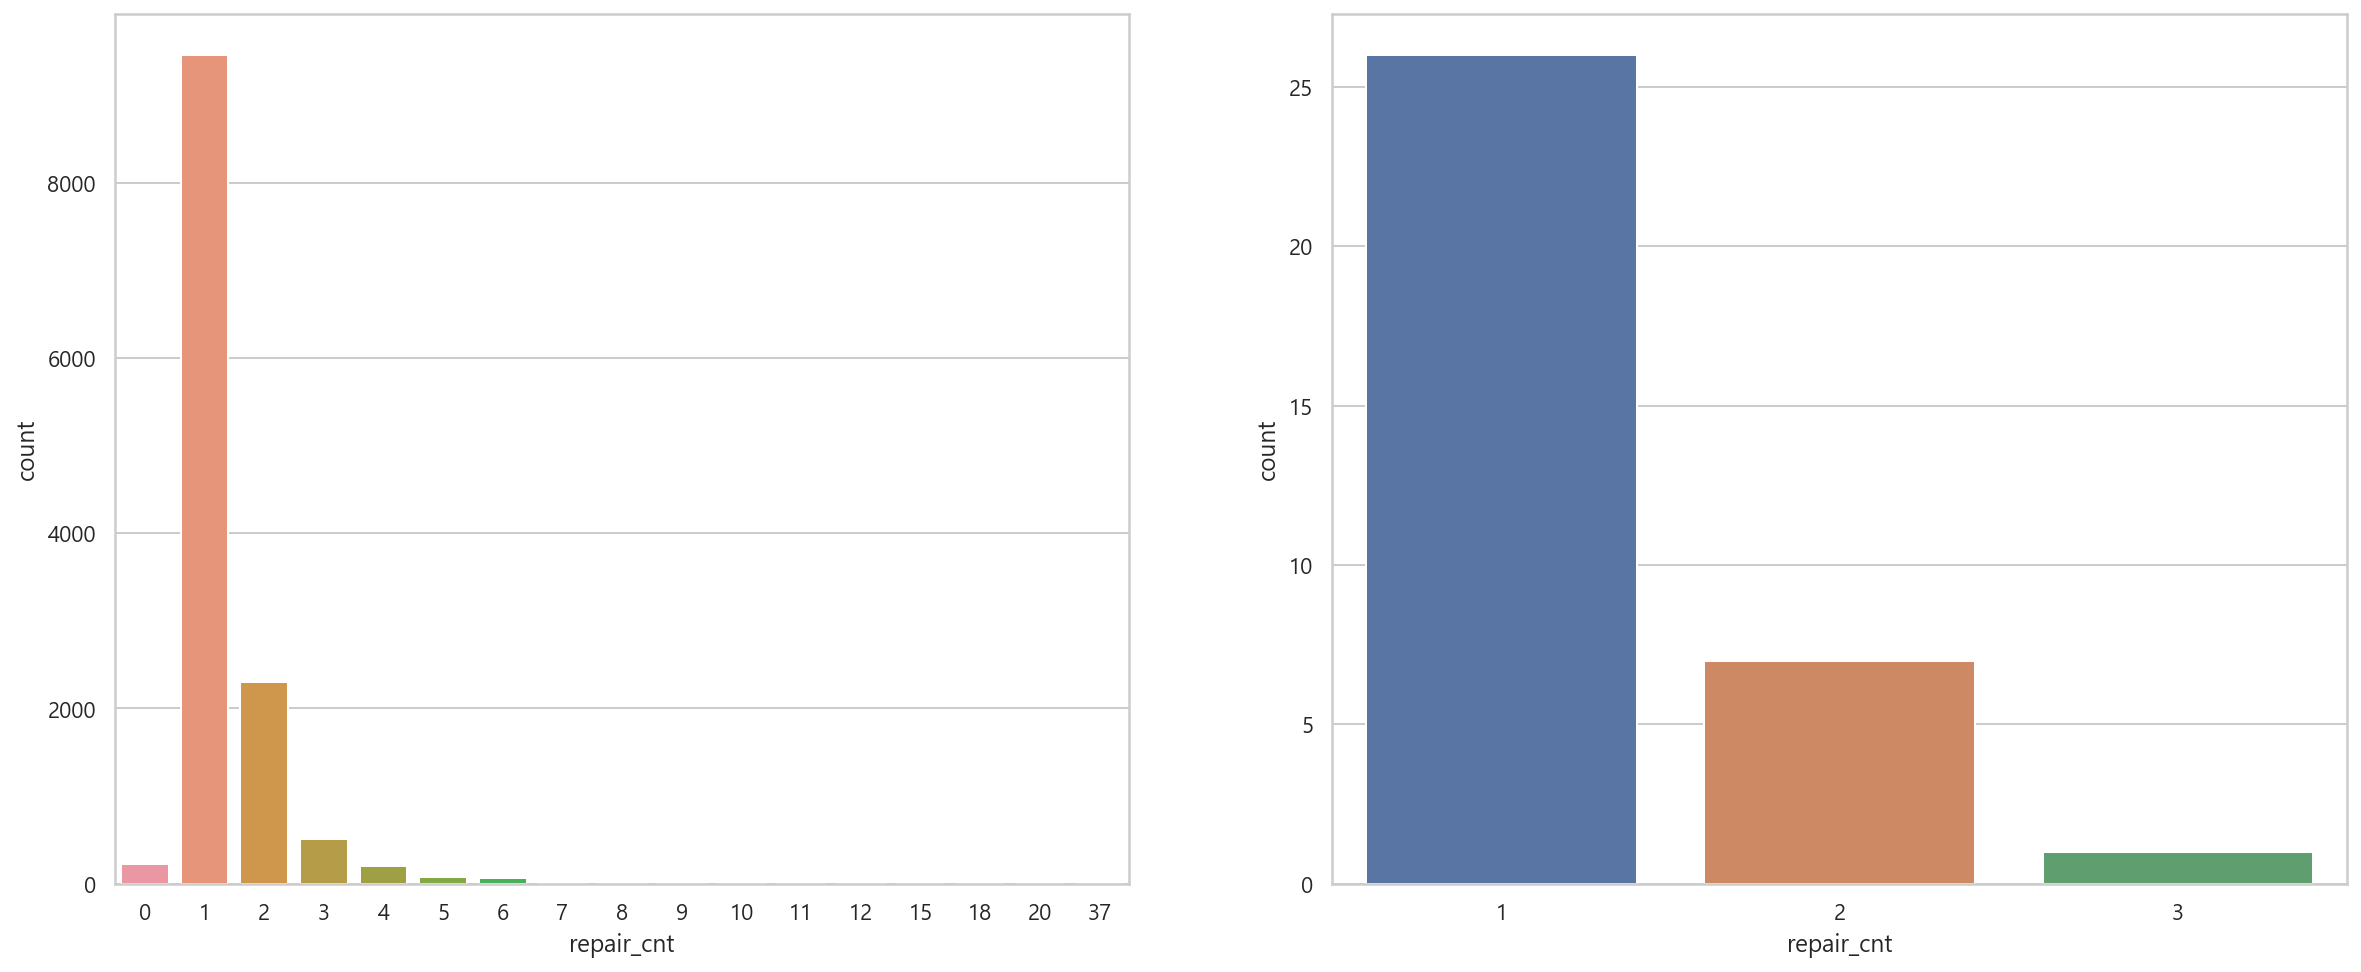

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar_tr, x='repair_cnt', ax=ax[0]);
sns.countplot(data=socar_tr[socar_tr.fraud_YN == 1], x='repair_cnt', ax=ax[1]);

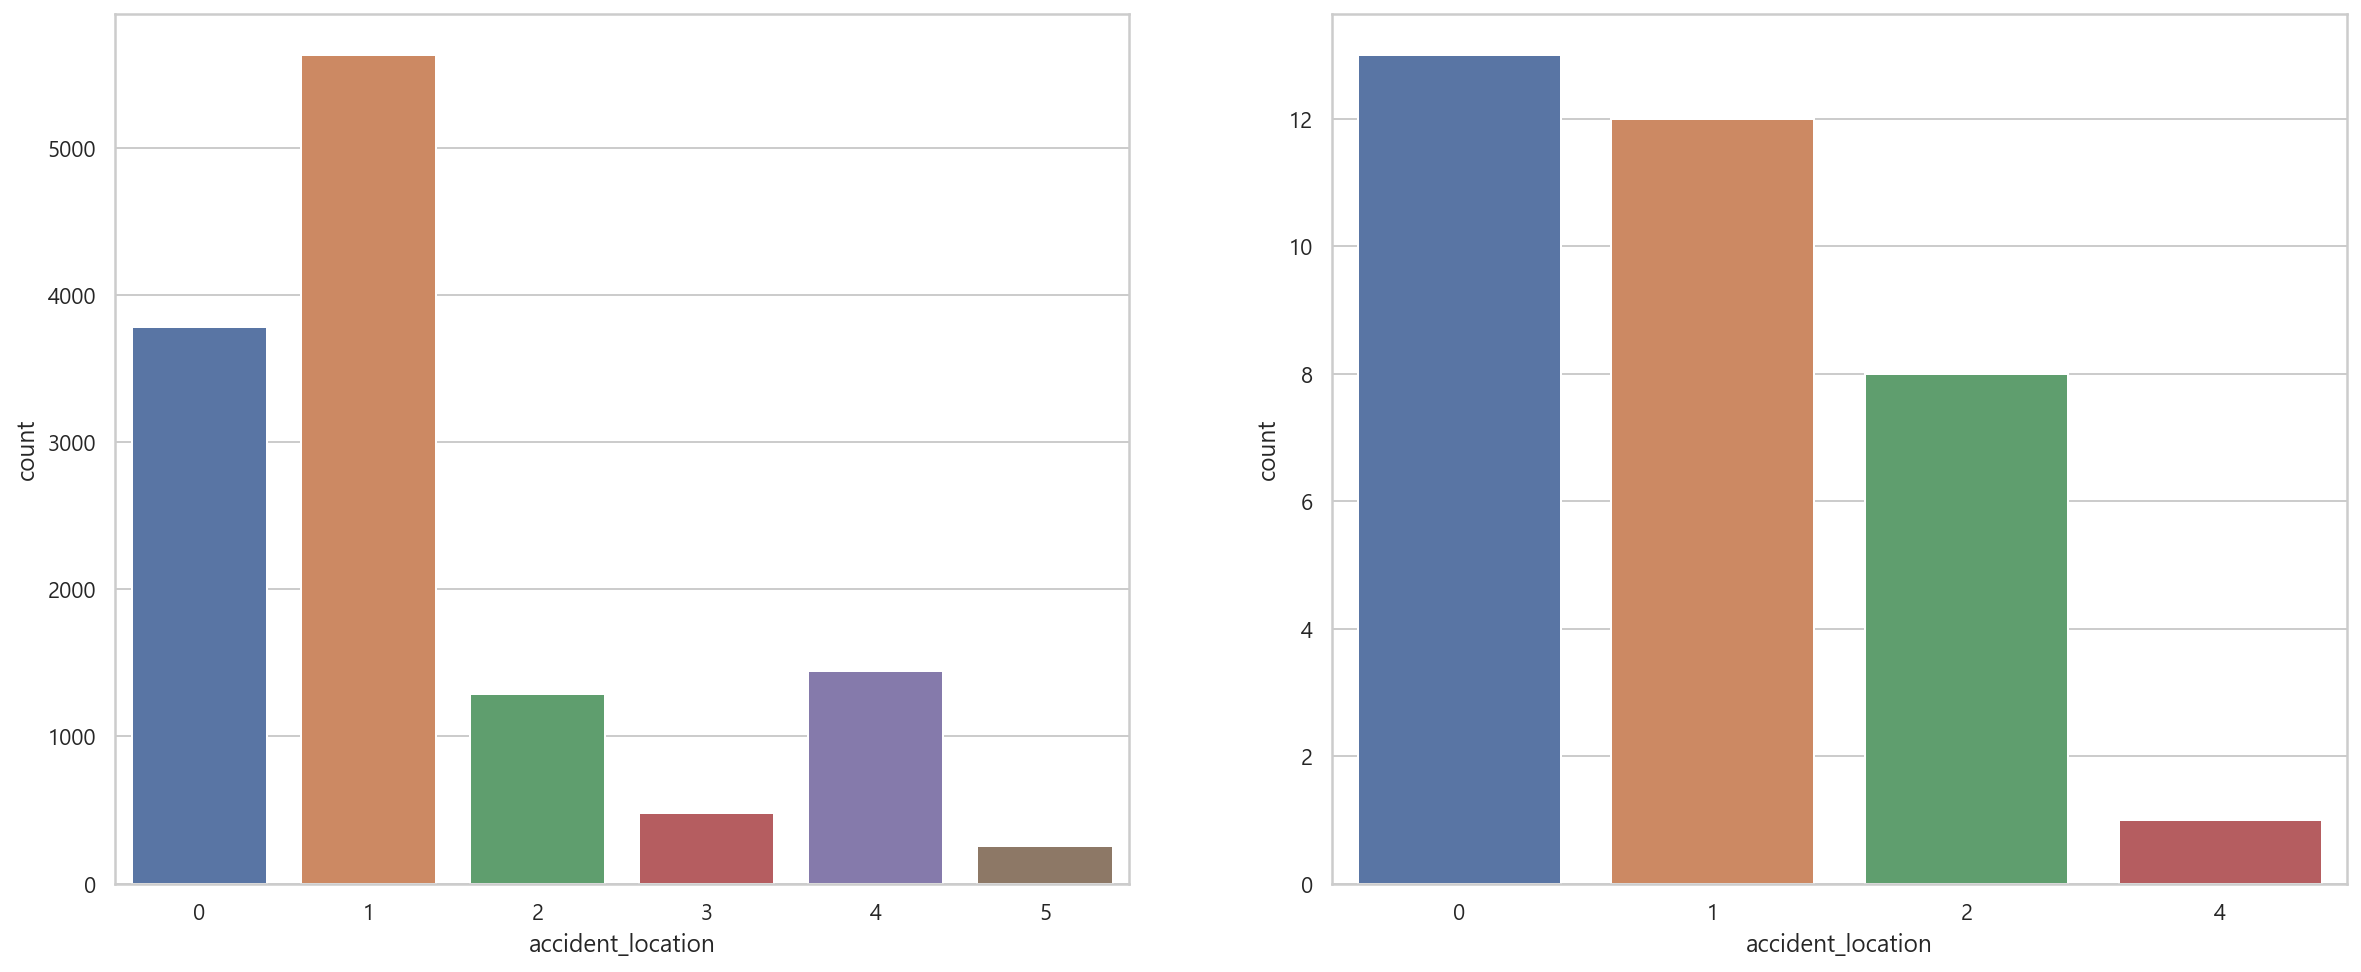

In [12]:
# 전체 데이터보다 이면도로나 쏘카존 사고 비율이 높음
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=socar_tr, x='accident_location', ax=ax[0]);
sns.countplot(data=socar_tr[socar_tr.fraud_YN == 1], x='accident_location', ax=ax[1]);

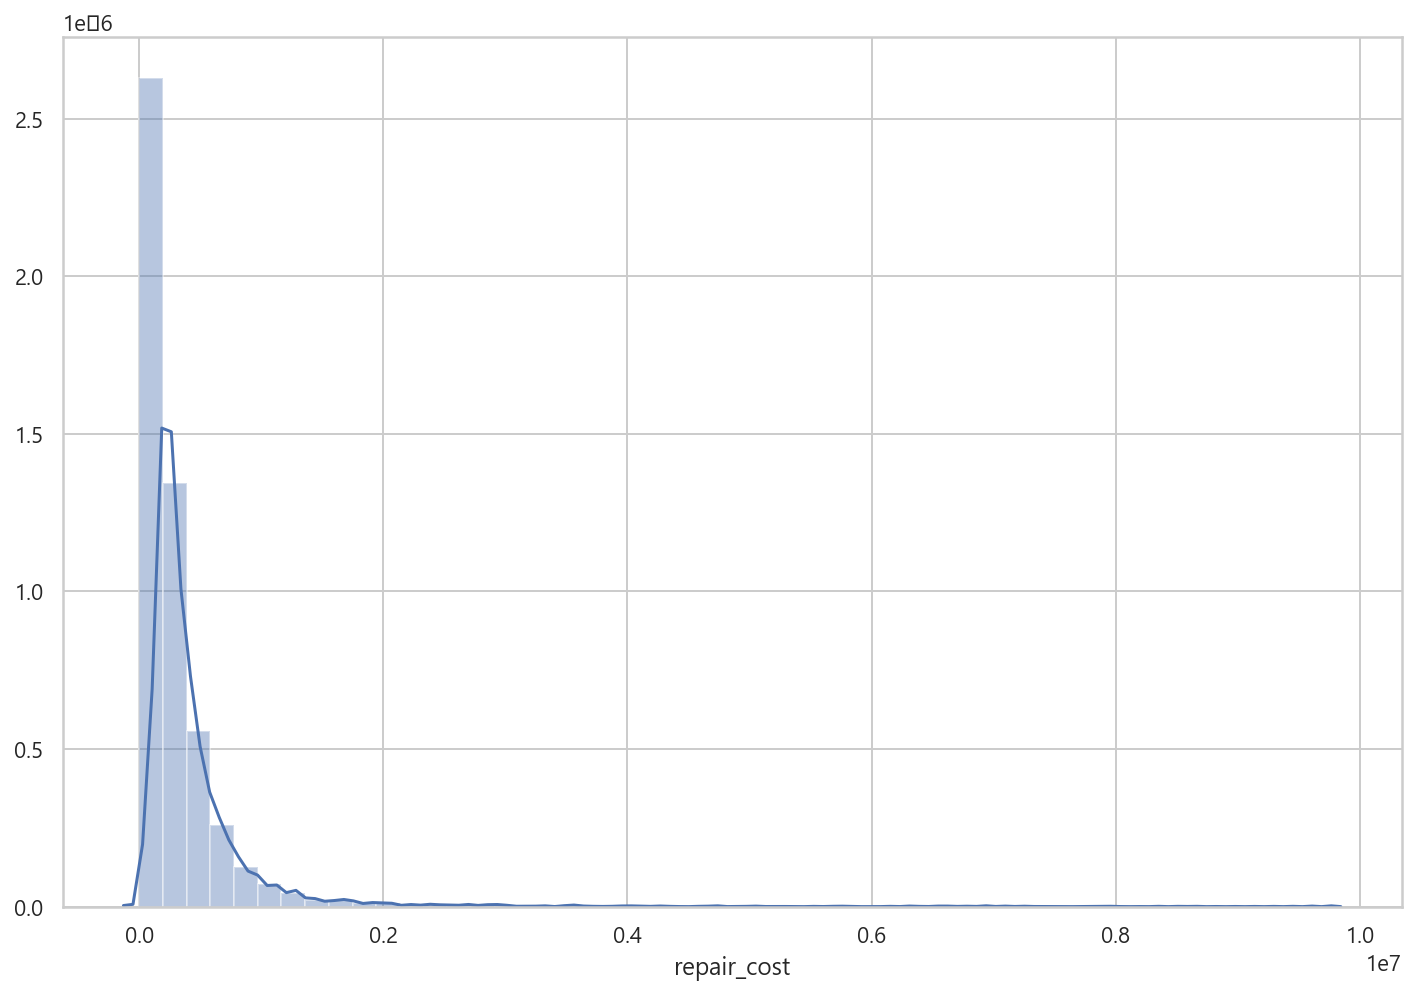

In [13]:
# Insure cost 0 means null
# Need to scale null and outlier datas.
plt.figure(figsize=(12,8))
sns.distplot(socar_tr["repair_cost"])
plt.show()

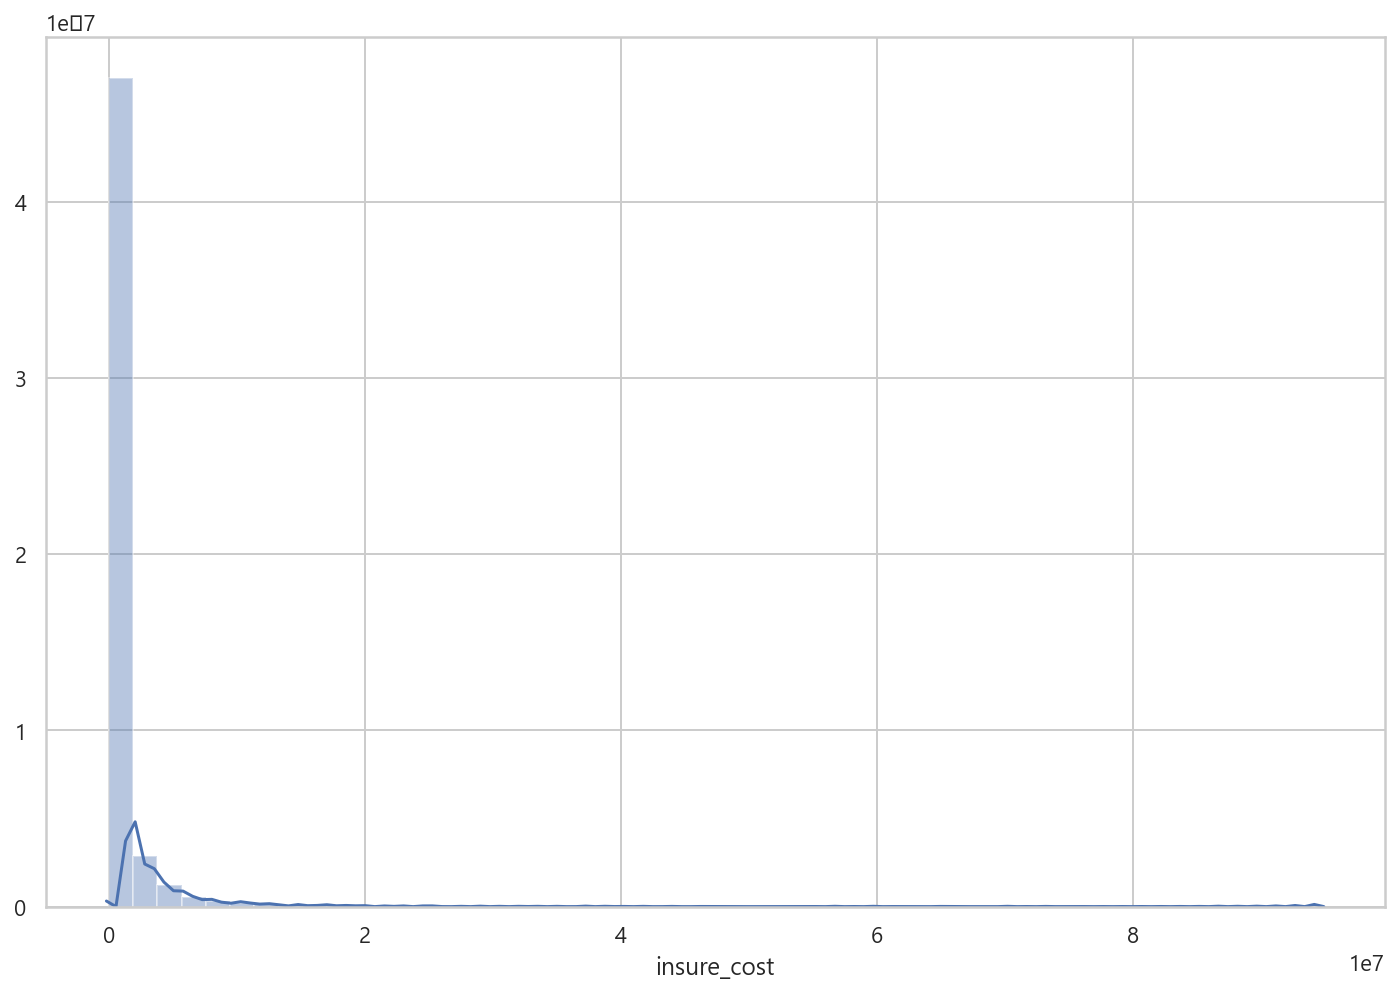

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(socar_tr["insure_cost"])
plt.show()

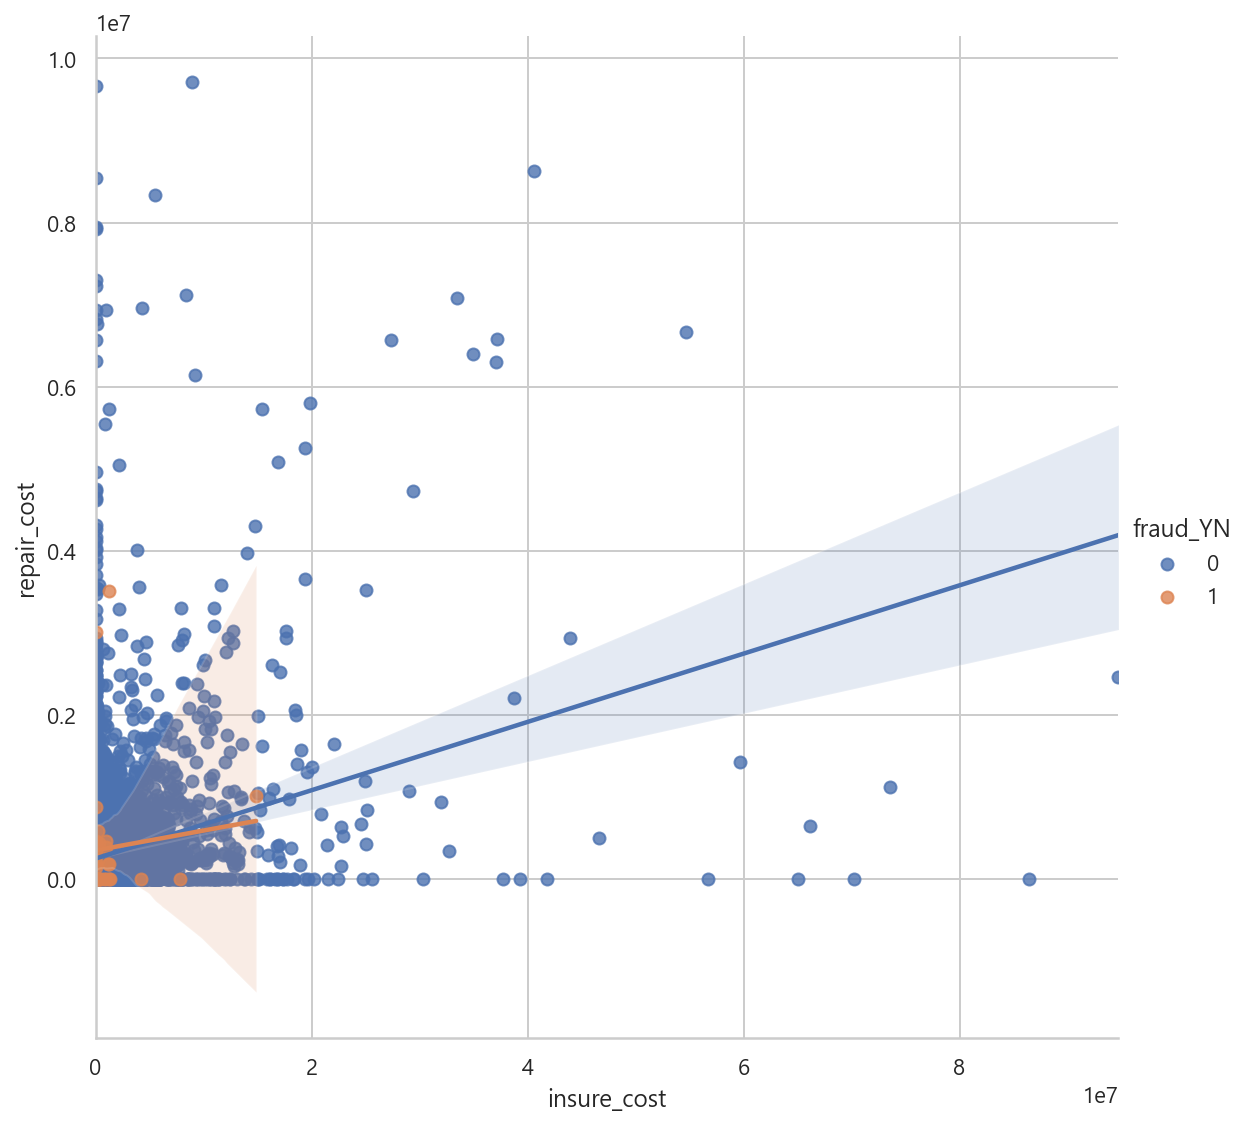

In [15]:
# Does insure cost and repair cnt affect repair cost?
sns.lmplot(data=socar_tr, x='insure_cost', y='repair_cost', hue='fraud_YN', size=8);

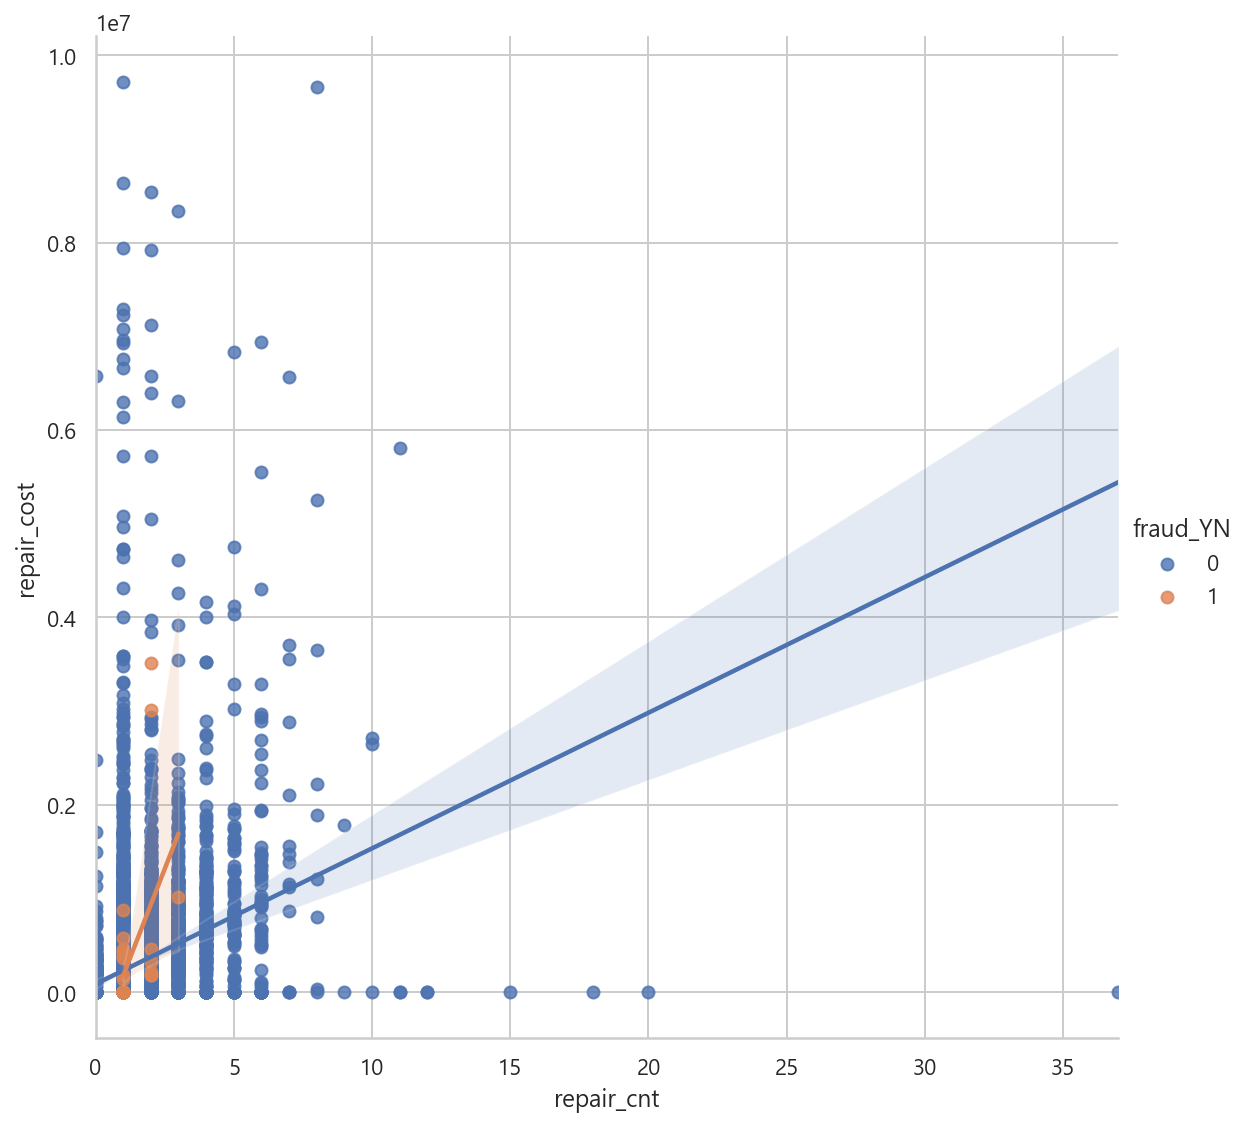

In [16]:
sns.lmplot(data=socar_tr, x='repair_cnt', y='repair_cost', hue='fraud_YN', size=8);

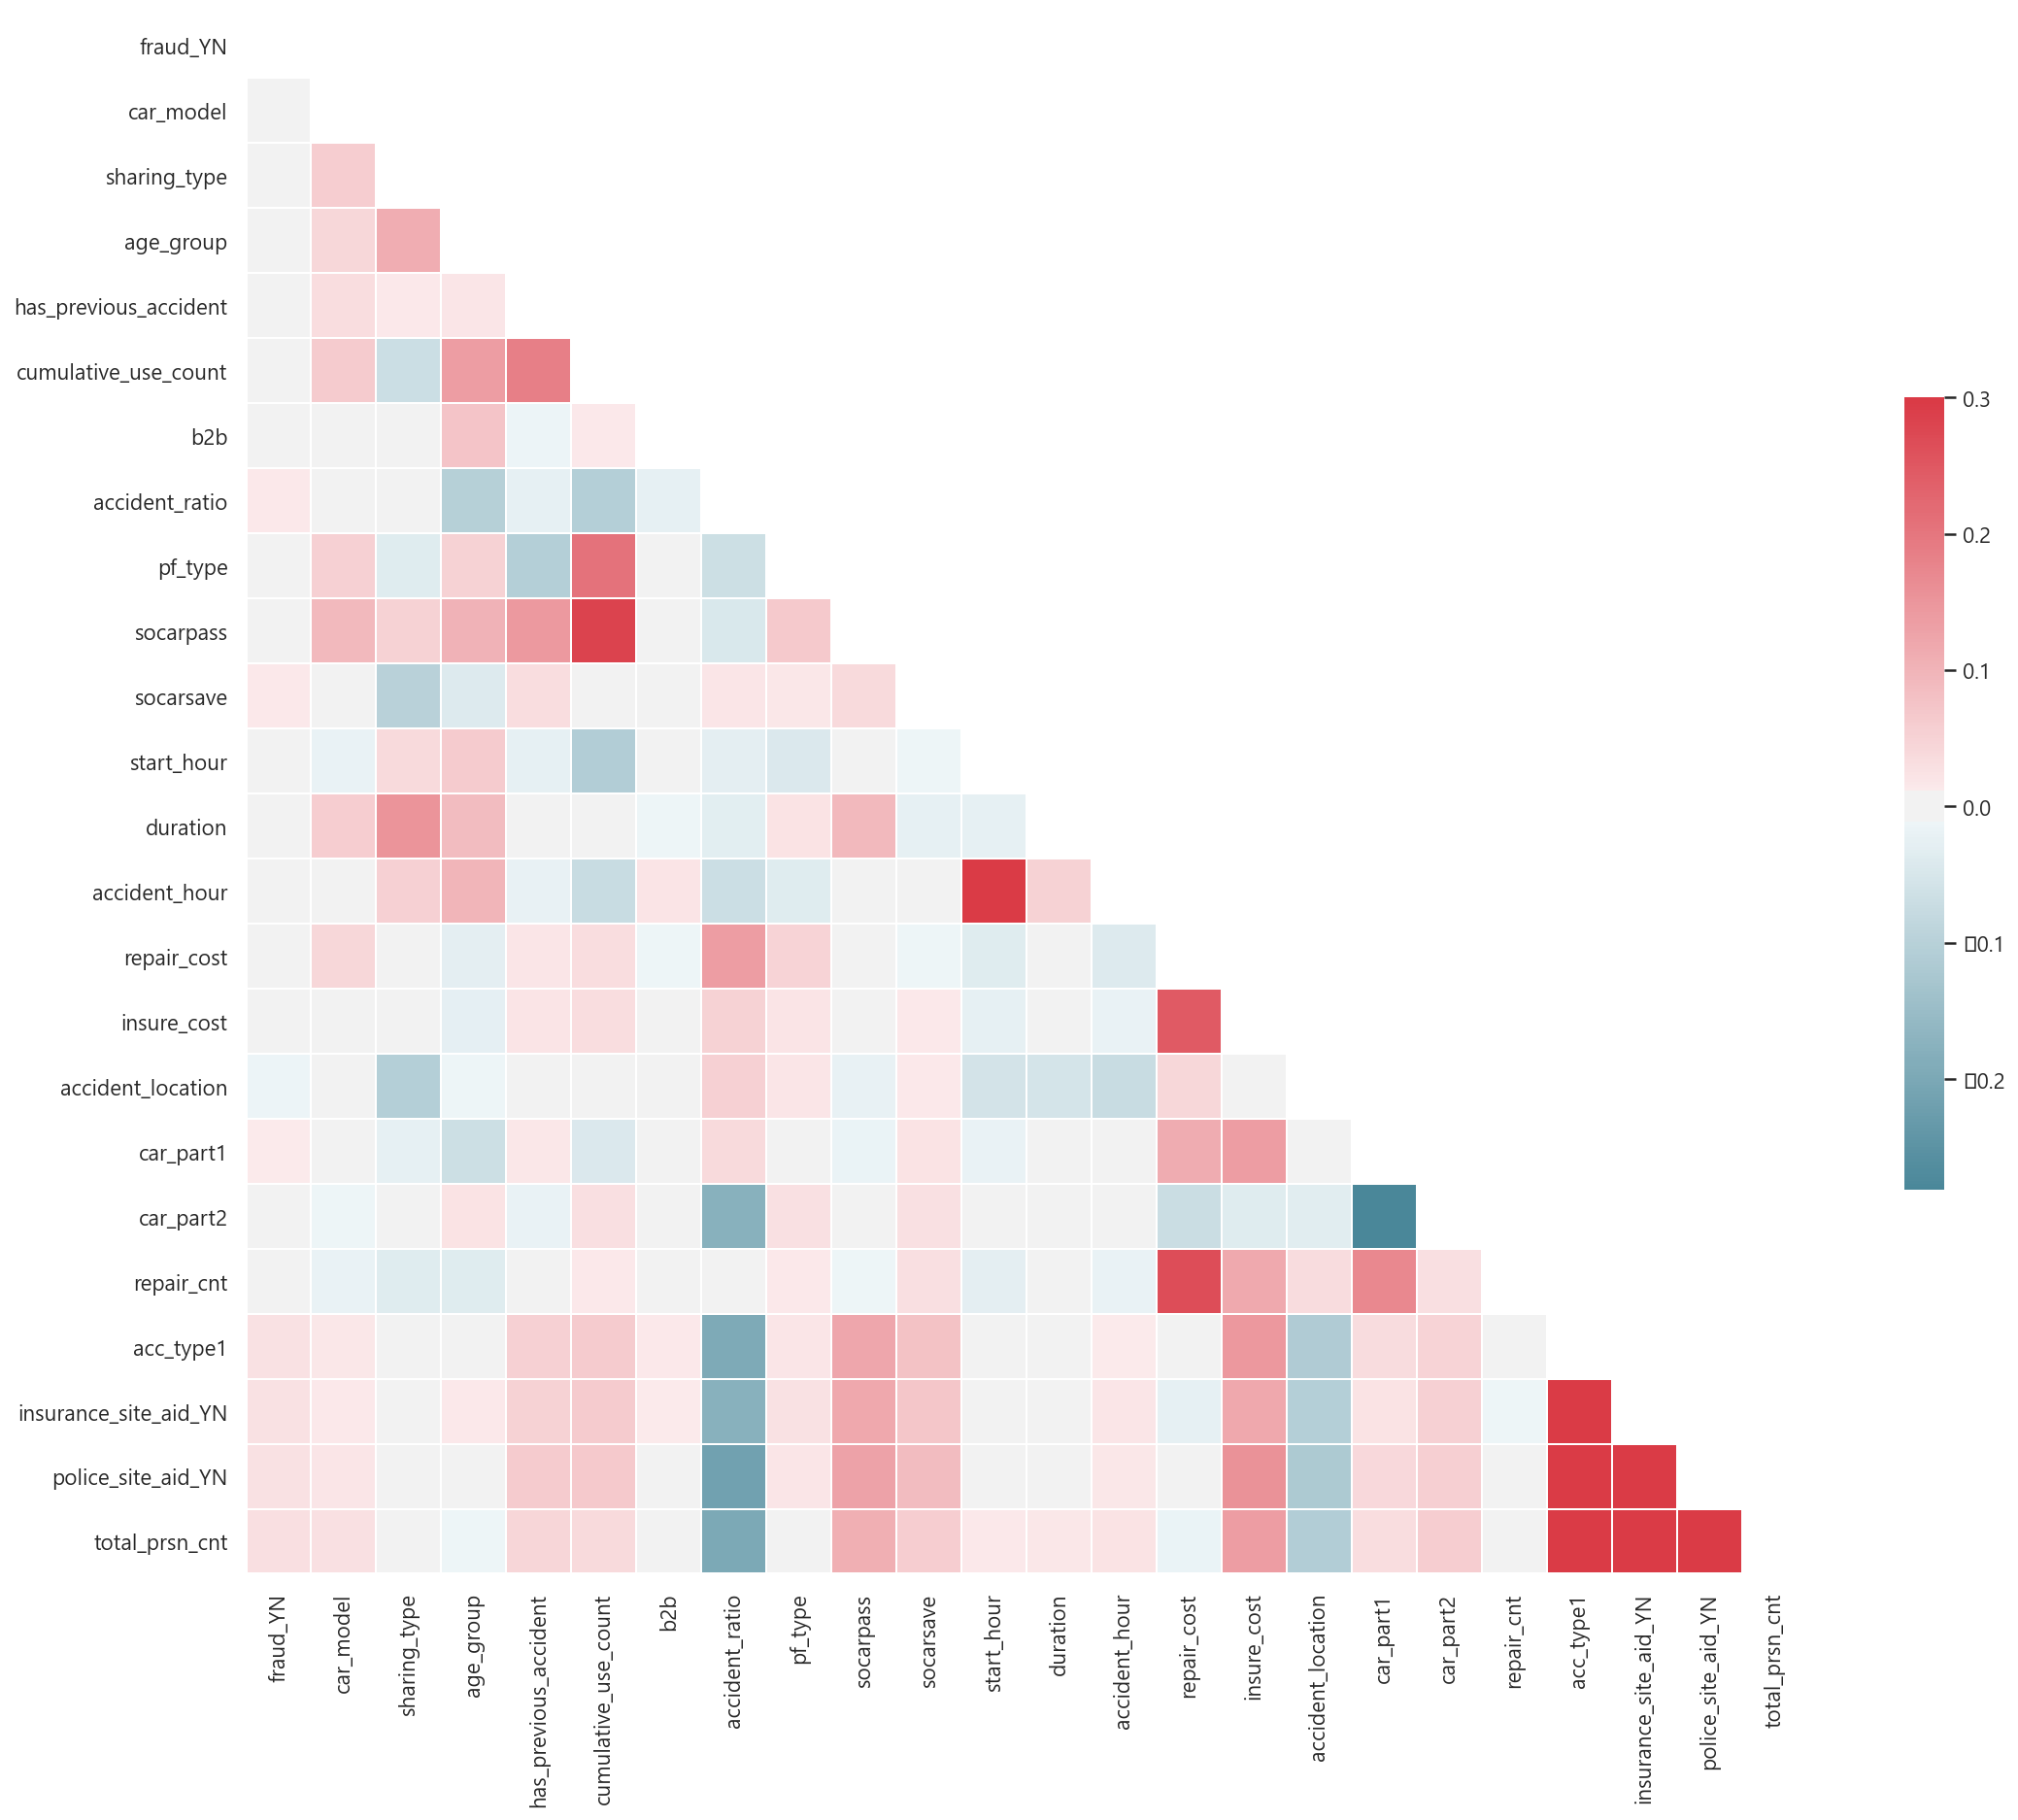

In [17]:
mask = np.zeros_like(socar_tr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(socar_tr.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({"VIF Factor": [variance_inflation_factor(socar_tr.values, idx) 
                             for idx in range(socar_tr.shape[1])], "features": socar_tr.columns})

,VIF Factor,features
0,1.005001,fraud_YN
1,5.628809,car_model
2,1.260204,sharing_type
3,5.570076,age_group
4,1.163280,has_previous_accident
5,6.445896,cumulative_use_count
6,1.014184,b2b
7,7.953500,accident_ratio
8,6.832080,pf_type
9,1.294077,socarpass


# Preprocessing

In [19]:
socar_pp = socar_tr.copy()

repair_cost_mean = socar[(socar['repair_cost'] < 3000000) & (socar['repair_cost'] > 100000)]['repair_cost'].mean()
insure_cost_mean = socar[(socar['insure_cost'] < 3000000) & (socar['insure_cost'] > 100000)]['insure_cost'].mean()

socar_pp['repair_cost'][(socar['repair_cost'] >= 3000000)] = repair_cost_mean
socar_pp['repair_cost'][(socar['repair_cost'] <= 100000)] = repair_cost_mean

socar_pp['insure_cost'][(socar['insure_cost'] >= 3000000)] = insure_cost_mean
socar_pp['insure_cost'][(socar['insure_cost'] <= 100000)] = insure_cost_mean

# Scaling
- OneHotEncoder & MinMaxScaler

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

def encoding(data, scaler):
    cat_attribs = ['car_model', 'age_group', 'cumulative_use_count', 'b2b', 'pf_type', 
                   'start_hour', 'duration', 'accident_hour', 'accident_location', 'repair_cnt',
                   'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt']

    num_attribs = ['accident_ratio', 'repair_cost', 'insure_cost']

    etc_attribs = ['sharing_type', 'has_previous_accident', 'socarpass', 'socarsave', 'car_part1', 'car_part2']

    full_pipeline = ColumnTransformer([('scaler', scaler, num_attribs),
                  ('cat', OneHotEncoder(), cat_attribs),
                  ('imputer', SimpleImputer(strategy='constant'), etc_attribs)])
    data = full_pipeline.fit_transform(data)
    
    return data

# Split dataset

In [21]:
from sklearn.model_selection import train_test_split

socar_1 = socar_pp.copy()

X = socar_1.drop('fraud_YN', axis=1)
y = socar_1['fraud_YN']

X_ss = encoding(X, MinMaxScaler())

X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=13, stratify=y)

In [22]:
X_train.shape, X_test.shape

((10303, 85), (2576, 85))

In [23]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([10276,    27], dtype=int64))

In [24]:
tmp_tr = np.unique(y_train, return_counts=True)[1]
tmp_test = np.unique(y_test, return_counts=True)[1]

print("ratio of y_train per x_train :", tmp_tr[1]/len(y_train) * 100)
print("ratio of y_test per x_test :", tmp_test[1]/len(y_test) * 100)

ratio of y_train per x_train : 0.2620595942929244
ratio of y_test per x_test : 0.2717391304347826


# Evaluation

In [25]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc


In [26]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('=> confusion matrix')
    print(confusion)
    print('===========')
    
    print('Accuracy : {0:.4f}, Precision:{1:.4f}'.format(acc, pre))
    print('Recall : {0:.4f}, F1:{1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))
    

In [27]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(random_state=10)
lg_clf.fit(X_train, y_train)
lg_pred = lg_clf.predict(X_test)

print_clf_eval(y_test, lg_pred)

=> confusion matrix
[[2569    0]
 [   7    0]]
Accuracy : 0.9973, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=10, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> confusion matrix
[[2568    1]
 [   7    0]]
Accuracy : 0.9969, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.4998


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> confusion matrix
[[2569    0]
 [   7    0]]
Accuracy : 0.9973, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


In [30]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> confusion matrix
[[2569    0]
 [   7    0]]
Accuracy : 0.9973, Precision:0.0000
Recall : 0.0000, F1:0.0000, AUC:0.5000


# Over Sampling

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [32]:
X_train.shape, y_train.shape, X_train_over.shape, y_train_over.shape

((10303, 85), (10303,), (20552, 85), (20552,))

In [33]:
np.unique(y_train, return_counts=True), np.unique(y_train_over, return_counts=True)

((array([0, 1], dtype=int64), array([10276,    27], dtype=int64)),
 (array([0, 1], dtype=int64), array([10276, 10276], dtype=int64)))

In [34]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []
    
    for model in models:

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        tmp.append(get_clf_eval(y_test, pred))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)


In [35]:
models = [dt_clf, rf_clf, lgbm_clf]
model_names = ['DecisionTree', 'RandomForest','LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  2.3812878131866455


,accuracy,precision,recall,f1,roc_auc
DecisionTree,0.803960,0.002,0.142857,0.003945,0.474309
RandomForest,0.997283,0.000,0.000000,0.000000,0.500000
LightGBM,0.997283,0.000,0.000000,0.000000,0.500000


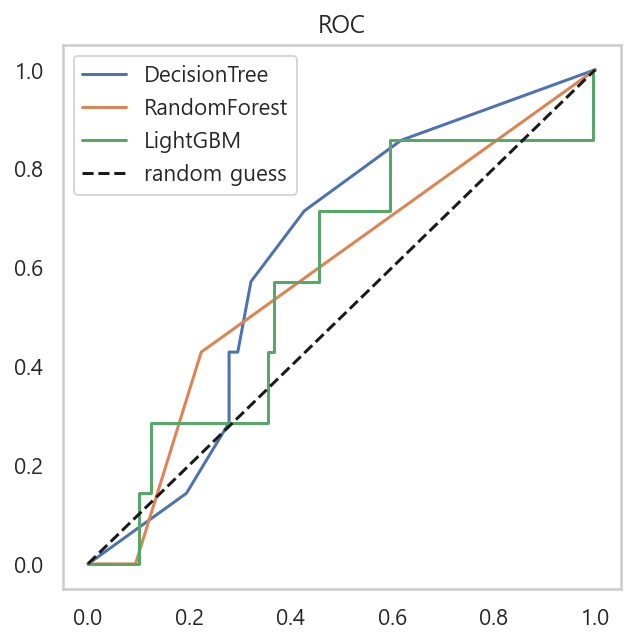

In [36]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_valid, y_valid):
    plt.figure(figsize=(5, 5))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_valid)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_valid, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        
    plt.plot([0, 1], [0, 1], "k--", label="random guess")
    plt.title("ROC")
    plt.legend()
    plt.grid()
    plt.show()
    
draw_roc_curve(models, model_names, X_test, y_test)

# Hyper Parameter Tuning
- All recall score is 0

In [37]:
# from sklearn.model_selection import GridSearchCV

# params = {'max_depth' : [2,4,6,8]}
# socar_tree = DecisionTreeClassifier(max_depth=2, random_state=10)

# gridsearch = GridSearchCV(estimator=socar_tree, param_grid=params, cv=5, scoring='recall')
# gridsearch.fit(X, y)
# gridsearch.best_estimator_

In [38]:
# params = {'n_estimators' : [50, 100, 150, 200]}
# socar_random = RandomForestClassifier(random_state=10, n_jobs=-1, n_estimators=100)

# gridsearch = GridSearchCV(estimator=socar_random, param_grid=params, cv=5, scoring='recall')
# gridsearch.fit(X, y)
# gridsearch.best_estimator_

In [39]:
# params = {'n_estimators' : [400, 700, 1000], 'num_leaves' : [16, 32, 64]}
# socar_lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

# gridsearch = GridSearchCV(estimator=socar_lgbm, param_grid=params, cv=5, scoring='recall')
# gridsearch.fit(X, y)
# gridsearch.best_estimator_

# Function

In [40]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud= df[df["fraud_YN"]==0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_25 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 = quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [41]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test, test_data):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []
    
    for model in models:
        # Modeling
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        tmp.append(get_clf_eval(y_test, pred))
        # predict test dataset
        pred_test = model.predict(test_data.drop('fraud_YN', axis=1))
        tmp.append(get_clf_eval(test_data.fraud_YN, pred_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


def model_scores(data, scaler, test_data=socar_test, drop_cols=[], sampling=SMOTE, random_state=13, onehotencoding=False):
    
    # drop columns
    if drop_cols:
        data = data.drop(drop_cols, axis=1) 
        test_data = test_data.drop(drop_cols, axis=1)
    
    # OneHotEncoding
    if onehotencoding:
        cat_attribs = ['car_model', 'age_group', 'cumulative_use_count', 'b2b', 'pf_type', 
                       'start_hour', 'accident_hour', 'accident_location', 'repair_cnt',
                       'acc_type1', 'insurance_site_aid_YN', 'police_site_aid_YN', 'total_prsn_cnt']
        
        cat_attribs = [attrib for attrib in cat_attribs if attrib not in drop_cols]
        
        data = pd.get_dummies(data, columns=cat_attribs)
        test_data = pd.get_dummies(test_data, columns=cat_attribs)
    
    X = data.drop('fraud_YN', axis=1)
    y = data.fraud_YN
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

    # scaling
    num_attribs = ['accident_ratio', 'repair_cost', 'insure_cost']

    num_attribs = [attrib for attrib in num_attribs if attrib not in drop_cols]
    
    scaler_obj = scaler
    scaler_obj.fit(X_train[num_attribs])

    X_train[num_attribs] = scaler_obj.transform(X_train[num_attribs])
    X_test[num_attribs] = scaler_obj.transform(X_test[num_attribs])
    test_data[num_attribs] = scaler_obj.transform(test_data[num_attribs])
    
    # sampling
    spl = sampling(random_state=random_state)
    X_train, y_train = spl.fit_sample(X_train, y_train)    
    
    # classifier
    lg_clf = LogisticRegression(random_state=random_state)
    dt_clf = DecisionTreeClassifier(random_state=random_state, max_depth=2)
    rf_clf = RandomForestClassifier(random_state=random_state, n_jobs=-1, n_estimators=100)
    lgbm_clf = LGBMClassifier(random_state=random_state, n_estimators=200, num_leaves=16, n_jobs=-1, boost_from_average=False)
    
    models = [lg_clf, dt_clf, rf_clf, lgbm_clf]
    model_names = ['LogisticRegression','LogisticRegression(test)','DecisionTree','DecisionTree(test)',
                   'RandomForest','RandomForest(test)','LightGBM','LightGBM(test)']
    
    start_time = time.time()
    results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test, test_data)
    
    return results

model_scores(socar_1, StandardScaler())

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.765916,0.000000,0.000000,0.000000,0.384002
LogisticRegression(test),0.795899,0.000000,0.000000,0.000000,0.398844
DecisionTree,0.758929,0.006431,0.571429,0.012719,0.665434
DecisionTree(test),0.528036,0.002038,0.428571,0.004057,0.478415
RandomForest,0.996118,0.000000,0.000000,0.000000,0.499416
RandomForest(test),0.997116,0.000000,0.000000,0.000000,0.499679
LightGBM,0.991460,0.000000,0.000000,0.000000,0.497081
LightGBM(test),0.995514,0.000000,0.000000,0.000000,0.498876


# 2nd Trial
- MinMaxScaler & OneHotEncoding
- Hyper Parameter Tuning

In [43]:
socar_2 = socar_pp.copy()

In [44]:
model_scores(socar_2, MinMaxScaler())

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.762422,0.000000,0.000000,0.000000,0.382250
LogisticRegression(test),0.997437,0.000000,0.000000,0.000000,0.499839
DecisionTree,0.561724,0.003540,0.571429,0.007036,0.566563
DecisionTree(test),0.416533,0.002741,0.714286,0.005461,0.565075
RandomForest,0.995730,0.000000,0.000000,0.000000,0.499221
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.991848,0.000000,0.000000,0.000000,0.497275
LightGBM(test),0.997757,0.000000,0.000000,0.000000,0.500000


# 3rd Trial
- Drop where repair_cnt is 0(null)
- StandardScaler Only

In [45]:
socar_3 = socar_pp.copy()

In [46]:
((socar_tr['fraud_YN'] == 0) & (socar_tr['repair_cnt'] == 0)).sum(), ((socar_tr['fraud_YN'] == 1) & (socar_tr['repair_cnt'] == 0)).sum()

(227, 0)

In [47]:
socar_3.drop(socar_tr[socar_tr['repair_cnt'] == 0].index, inplace=True)

In [48]:
model_scores(socar_3, StandardScaler())

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.805215,0.00000,0.000000,0.000000,0.403724
LogisticRegression(test),0.997757,0.00000,0.000000,0.000000,0.500000
DecisionTree,0.839194,0.00495,0.285714,0.009732,0.563222
DecisionTree(test),0.997757,0.00000,0.000000,0.000000,0.500000
RandomForest,0.996444,0.00000,0.000000,0.000000,0.499604
RandomForest(test),0.997757,0.00000,0.000000,0.000000,0.500000
LightGBM,0.993283,0.00000,0.000000,0.000000,0.498019
LightGBM(test),0.997757,0.00000,0.000000,0.000000,0.500000


# 4th Trial
- Preprocessing null to median
- Drop Outlier
- Drop where repair_cnt is 0(null)
- StandardScaler Only

In [49]:
socar_4 = socar_tr.copy()

In [50]:
repair_cost_median = socar_tr[(socar_tr['repair_cost'] != 0)]['repair_cost'].median()
socar_4['repair_cost'][(socar_4['repair_cost'] == 0)] = repair_cost_median

insure_cost_median = socar_tr[(socar_tr['insure_cost'] != 0)]['insure_cost'].median()
socar_4['insure_cost'][(socar_4['insure_cost'] == 0)] = insure_cost_median

In [51]:
socar_4.drop(get_outlier(df=socar_4, column='repair_cost'), inplace=True)

In [52]:
socar_4.drop(get_outlier(df=socar_4, column='insure_cost'), inplace=True)

In [53]:
socar_4.drop(socar_4[socar_4['repair_cnt'] == 0].index, inplace=True)

In [54]:
model_scores(socar_4, StandardScaler())

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.787960,0.006369,0.428571,0.012552,0.608833
LogisticRegression(test),0.992951,0.000000,0.000000,0.000000,0.497592
DecisionTree,0.738544,0.005164,0.428571,0.010204,0.584047
DecisionTree(test),0.528036,0.002038,0.428571,0.004057,0.478415
RandomForest,0.995058,0.000000,0.000000,0.000000,0.499099
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.987421,0.000000,0.000000,0.000000,0.495268
LightGBM(test),0.997757,0.000000,0.000000,0.000000,0.500000


# 5th Trial
- Drop insure_cost & repair_cost
- Drop where repair_cnt, accident_hour, and accident_location is null
- MinMaxScaler Only

In [55]:
socar_5 = socar_tr.copy()

In [56]:
socar_5.drop(socar_tr[(socar_tr['repair_cnt'] == 0) | (socar_tr['accident_hour'] == -1) | (socar_tr['accident_location'] == 5)].index, inplace=True)

In [57]:
model_scores(socar_5, MinMaxScaler(), drop_cols=['repair_cost','insure_cost'])

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.780684,0.001852,0.142857,0.003656,0.462672
LogisticRegression(test),0.990067,0.000000,0.000000,0.000000,0.496146
DecisionTree,0.854326,0.002801,0.142857,0.005495,0.499596
DecisionTree(test),0.709068,0.002210,0.285714,0.004386,0.497867
RandomForest,0.993561,0.000000,0.000000,0.000000,0.498184
RandomForest(test),0.997757,0.000000,0.000000,0.000000,0.500000
LightGBM,0.983099,0.000000,0.000000,0.000000,0.492938
LightGBM(test),0.997757,0.000000,0.000000,0.000000,0.500000


# 6th Trial
- Drop police_site_aid_YN & acc_type1
- Drop where repair_cnt is 0(null)
- MinMaxScaler Only

In [58]:
socar_6 = socar_tr.copy()

In [59]:
socar_6.drop(socar_tr[socar_tr['repair_cnt'] == 0].index, inplace=True)

In [60]:
model_scores(socar_6, MinMaxScaler(), drop_cols=['police_site_aid_YN', 'acc_type1'])

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.815488,0.00000,0.000000,0.000000,0.408875
LogisticRegression(test),0.997437,0.00000,0.000000,0.000000,0.499839
DecisionTree,0.839194,0.00495,0.285714,0.009732,0.563222
DecisionTree(test),0.997757,0.00000,0.000000,0.000000,0.500000
RandomForest,0.996049,0.00000,0.000000,0.000000,0.499406
RandomForest(test),0.997757,0.00000,0.000000,0.000000,0.500000
LightGBM,0.992493,0.00000,0.000000,0.000000,0.497623
LightGBM(test),0.997757,0.00000,0.000000,0.000000,0.500000


# 7th Trial
- SMOTETomek
- Drop police_site_aid_YN & acc_type1
- Drop where repair_cnt is 0(null)
- MinMaxScaler Only

In [61]:
socar_7 = socar_tr.copy()

In [62]:
socar_7.drop(socar_tr[socar_tr['repair_cnt'] == 0].index, inplace=True)

In [63]:
model_scores(socar_7, MinMaxScaler(), drop_cols=['police_site_aid_YN', 'acc_type1'], sampling=SMOTETomek)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.815488,0.00000,0.000000,0.000000,0.408875
LogisticRegression(test),0.997437,0.00000,0.000000,0.000000,0.499839
DecisionTree,0.839194,0.00495,0.285714,0.009732,0.563222
DecisionTree(test),0.997757,0.00000,0.000000,0.000000,0.500000
RandomForest,0.996049,0.00000,0.000000,0.000000,0.499406
RandomForest(test),0.997757,0.00000,0.000000,0.000000,0.500000
LightGBM,0.992493,0.00000,0.000000,0.000000,0.497623
LightGBM(test),0.997757,0.00000,0.000000,0.000000,0.500000


# 8th Trial
- Under Sampling
- Drop insure_cost & repair_cost
- Drop where repair_cnt, accident_hour, and accident_location is null
- MinMaxScaler & OneHotEncoding

In [64]:
socar_8 = socar_tr.copy()

In [65]:
socar_8.drop(socar_tr[(socar_tr['repair_cnt'] == 0) | (socar_tr['accident_hour'] == -1) | (socar_tr['accident_location'] == 5)].index, inplace=True)

In [66]:
model_scores(socar_8, MinMaxScaler(), drop_cols=['repair_cost','insure_cost'], sampling=RandomUnderSampler)

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.513883,0.001660,0.285714,0.003300,0.400121
LogisticRegression(test),0.824736,0.001845,0.142857,0.003643,0.484563
DecisionTree,0.672837,0.003695,0.428571,0.007326,0.551049
DecisionTree(test),0.667414,0.001932,0.285714,0.003839,0.476993
RandomForest,0.563783,0.004600,0.714286,0.009141,0.638822
RandomForest(test),0.773150,0.002837,0.285714,0.005618,0.529980
LightGBM,0.534406,0.002595,0.428571,0.005159,0.481638
LightGBM(test),0.412368,0.003802,1.000000,0.007576,0.705523
